C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


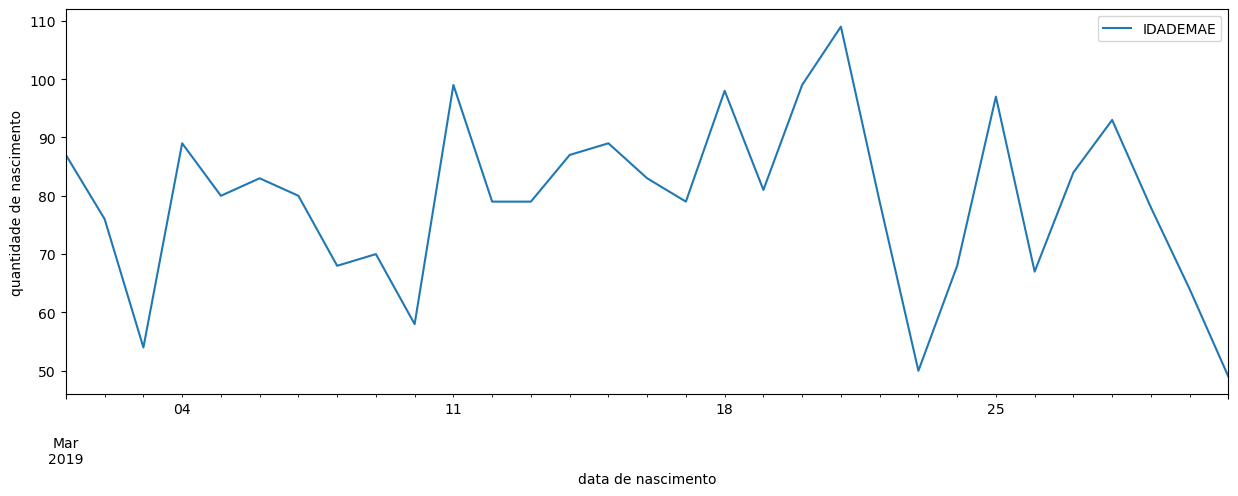

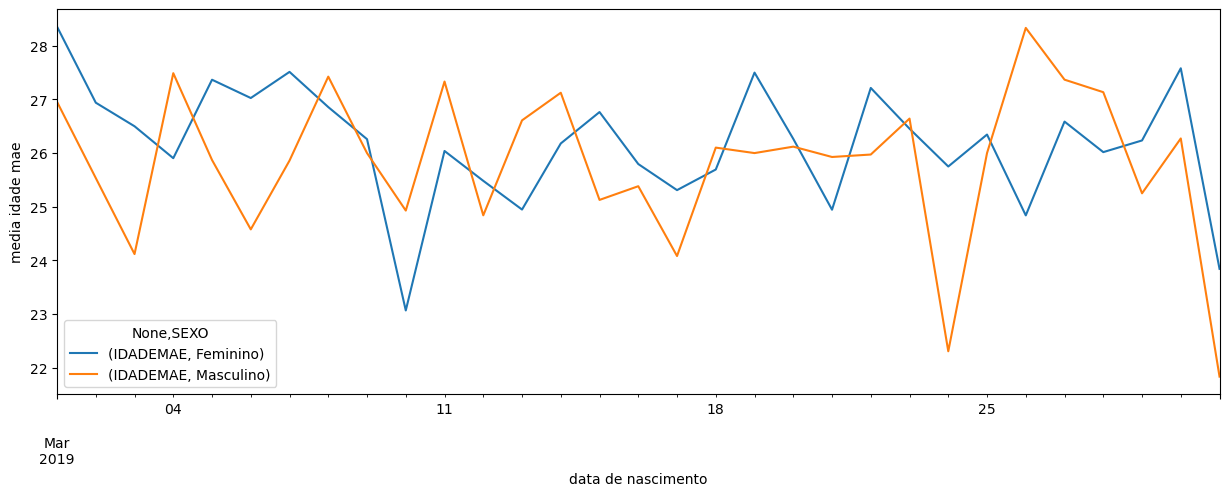

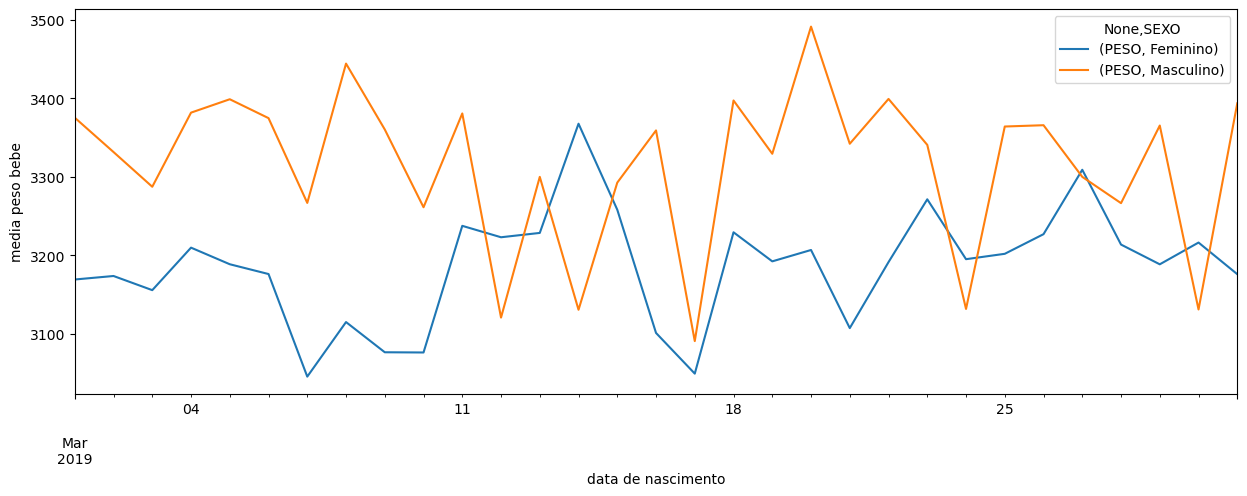

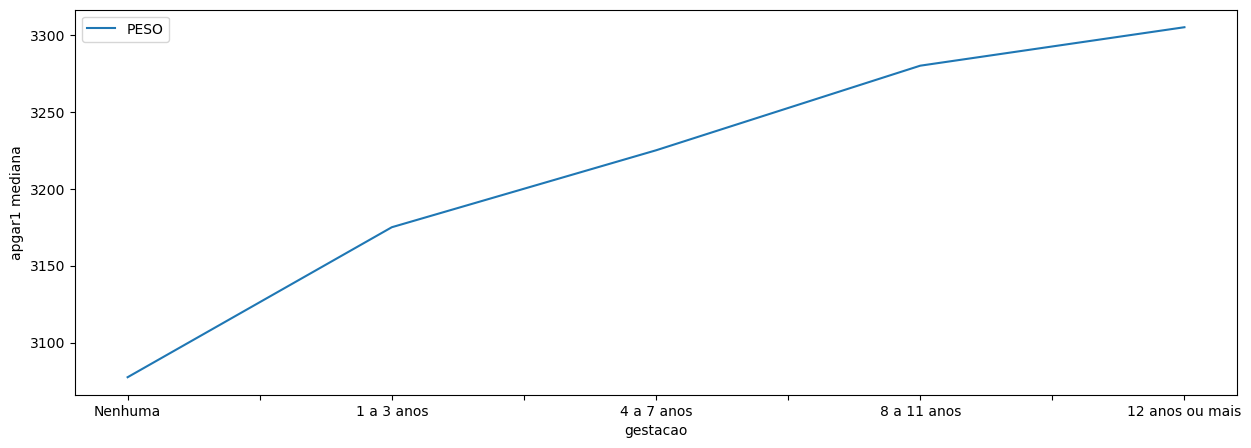

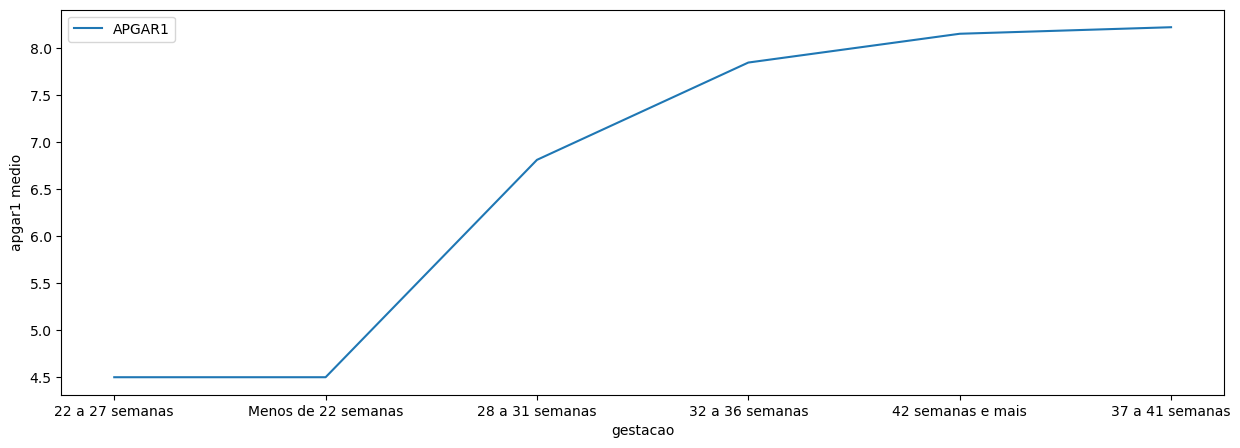

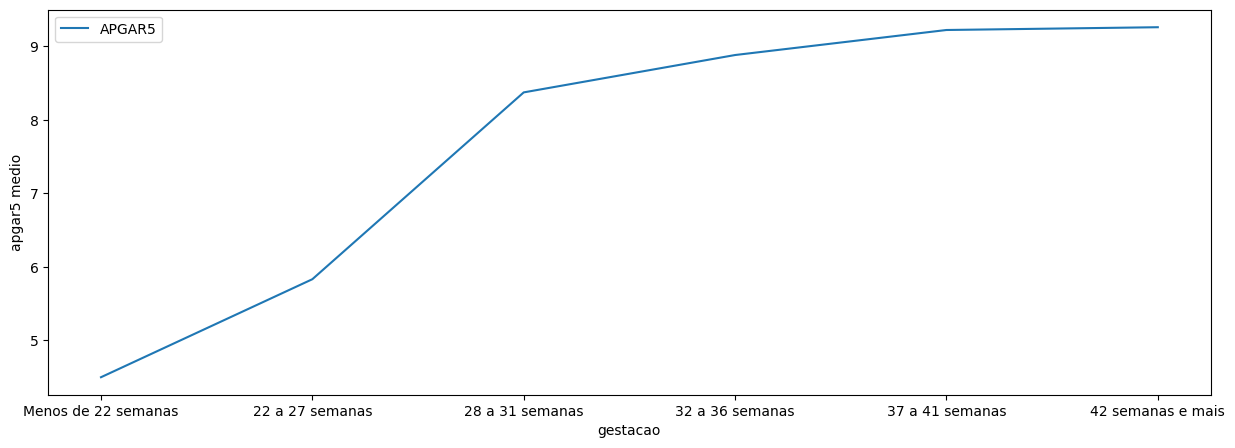

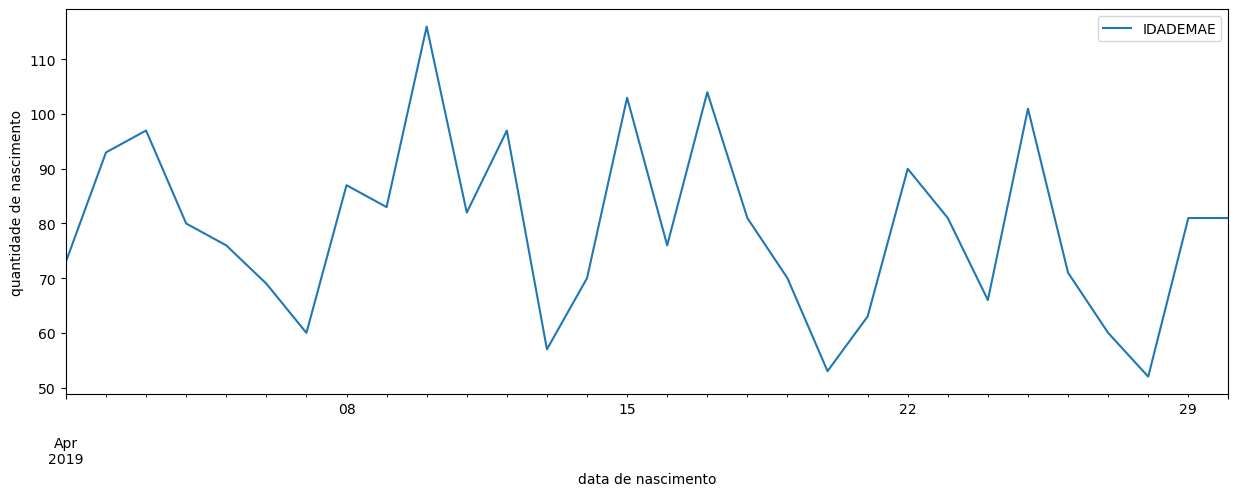

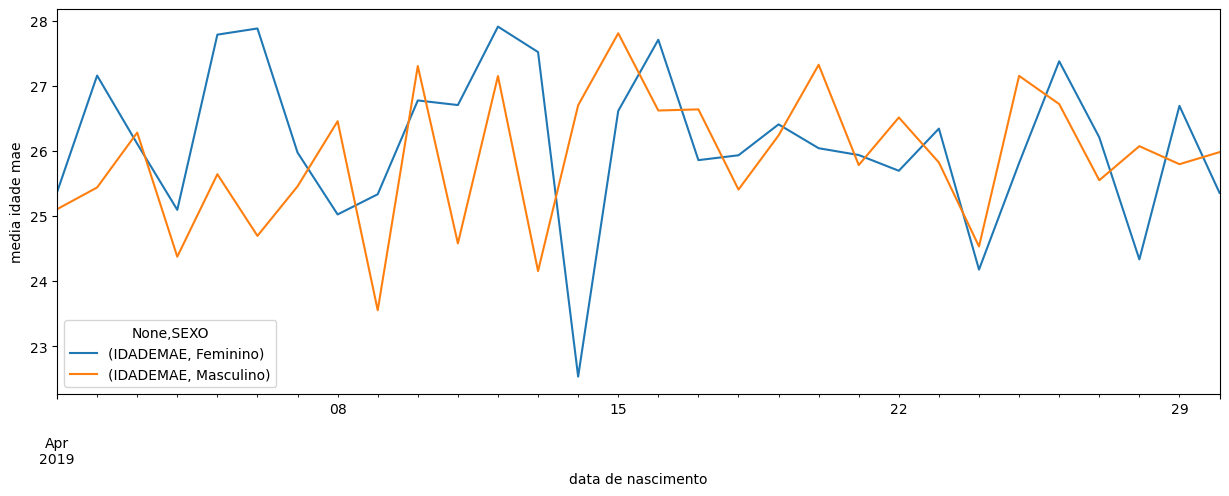

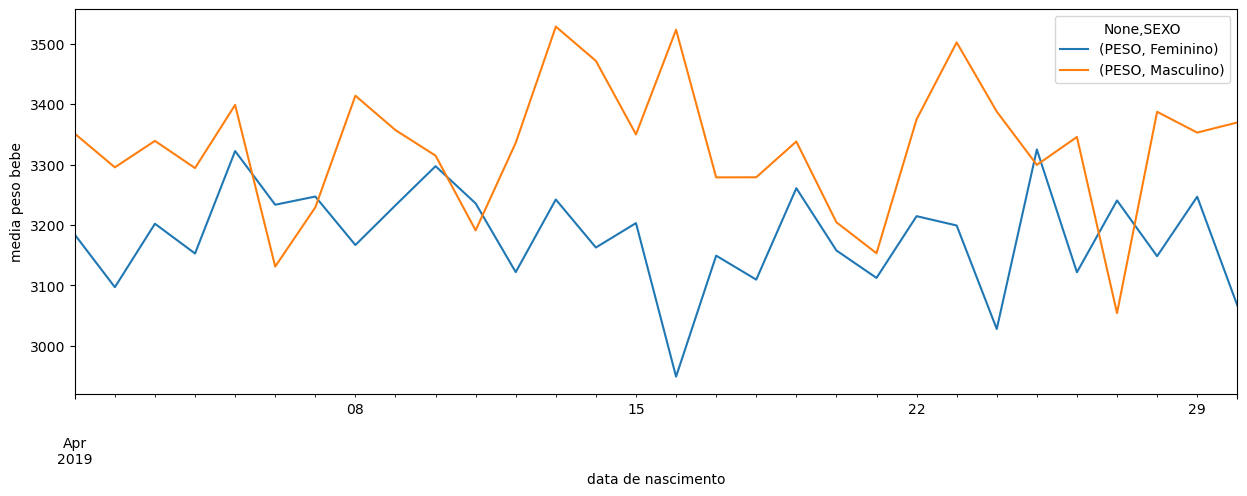

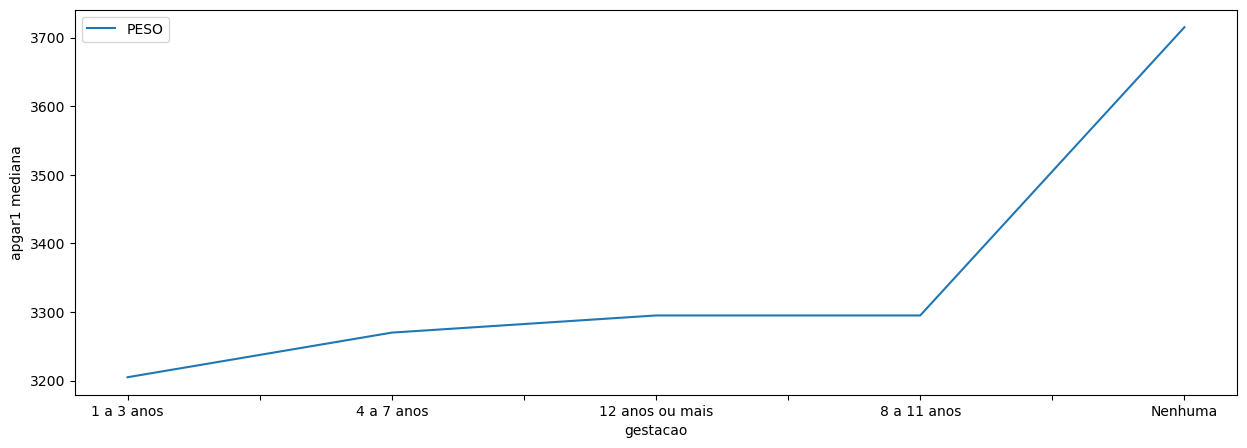

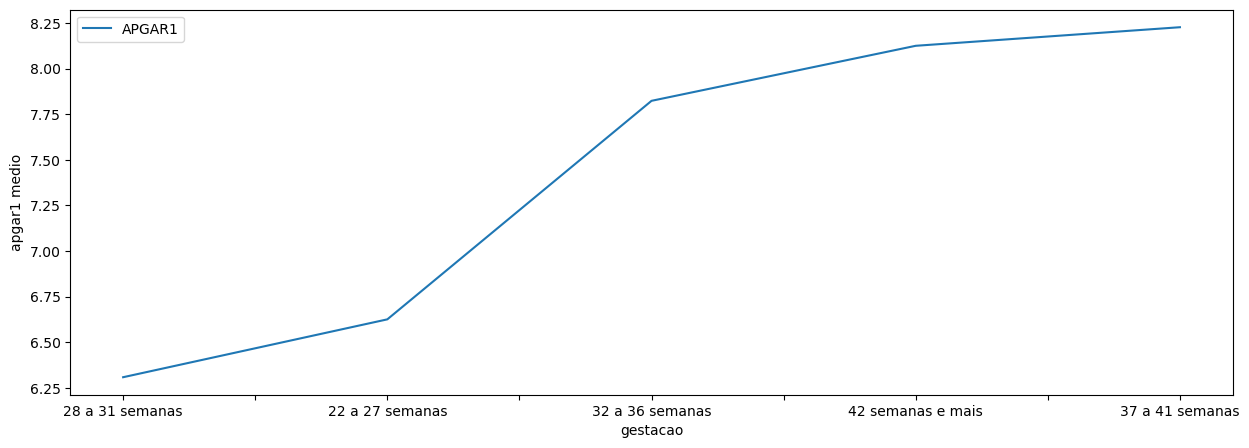

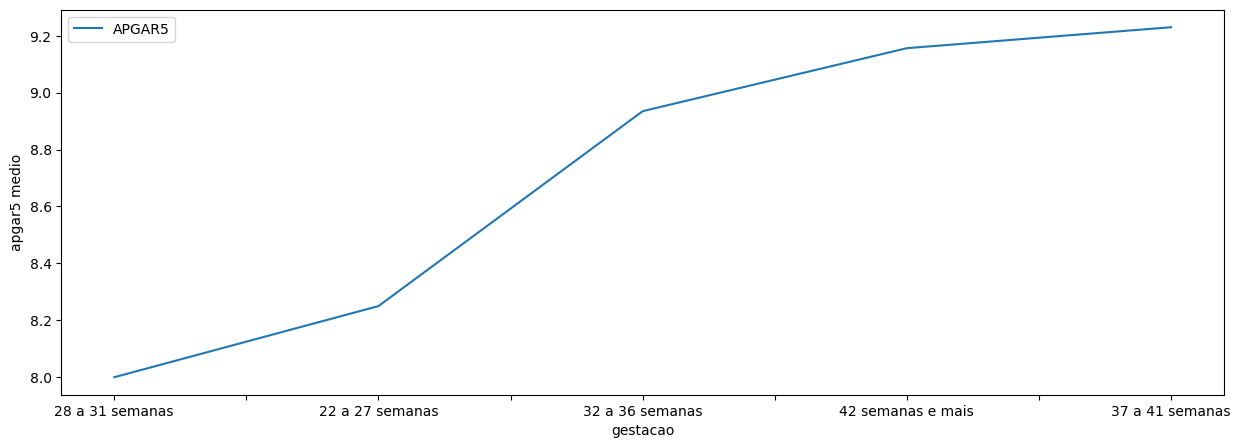

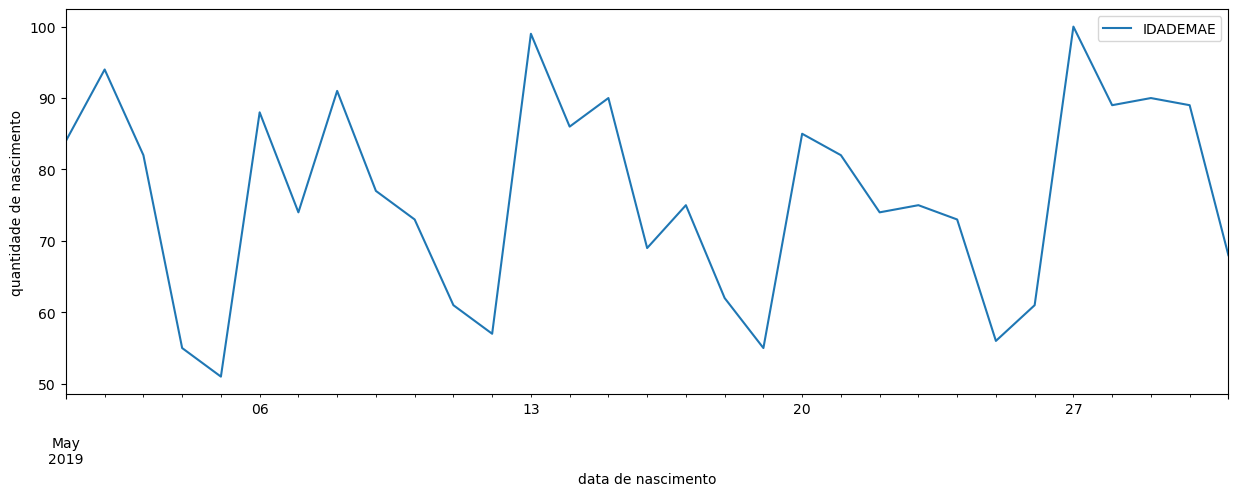

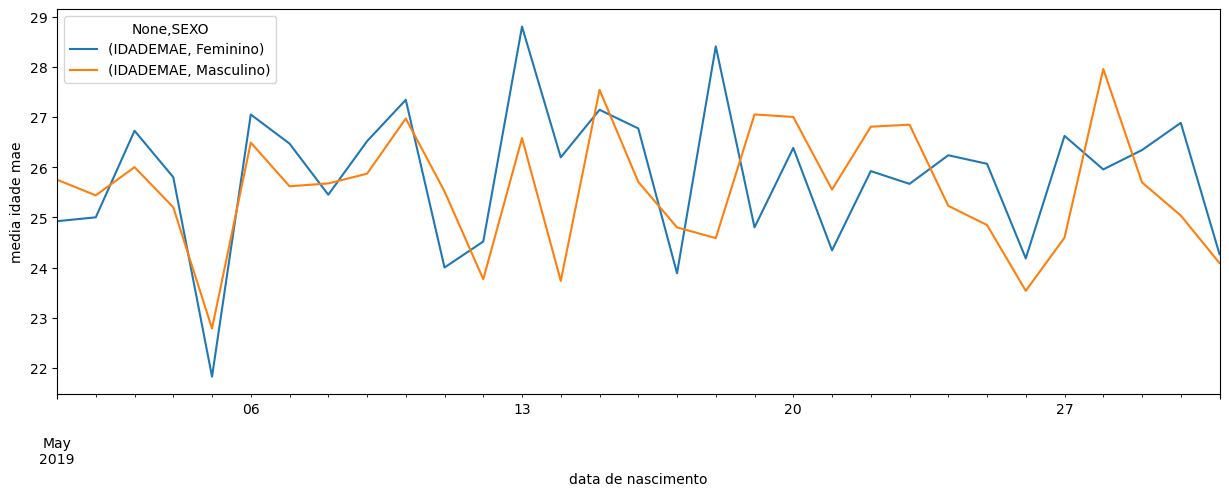

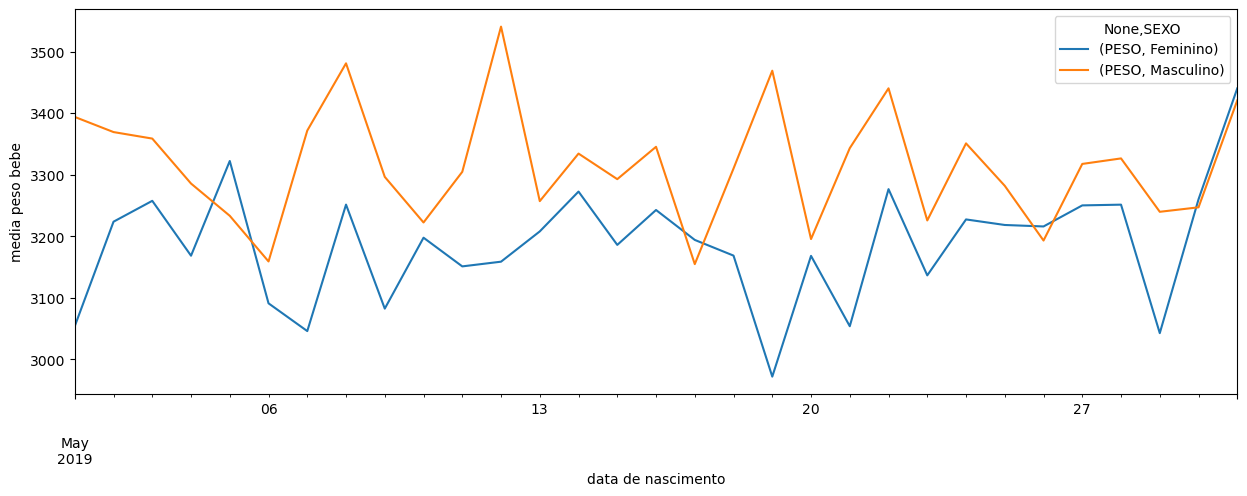

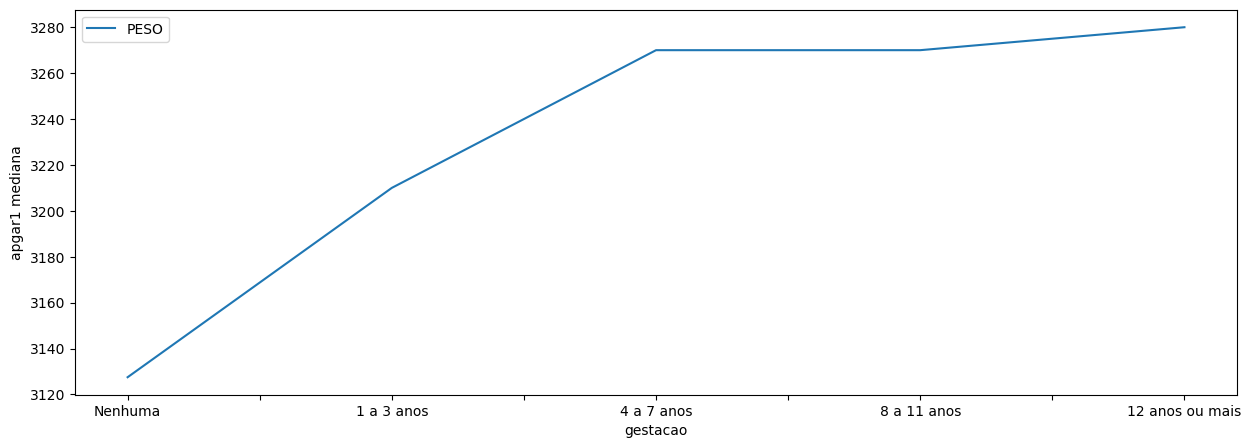

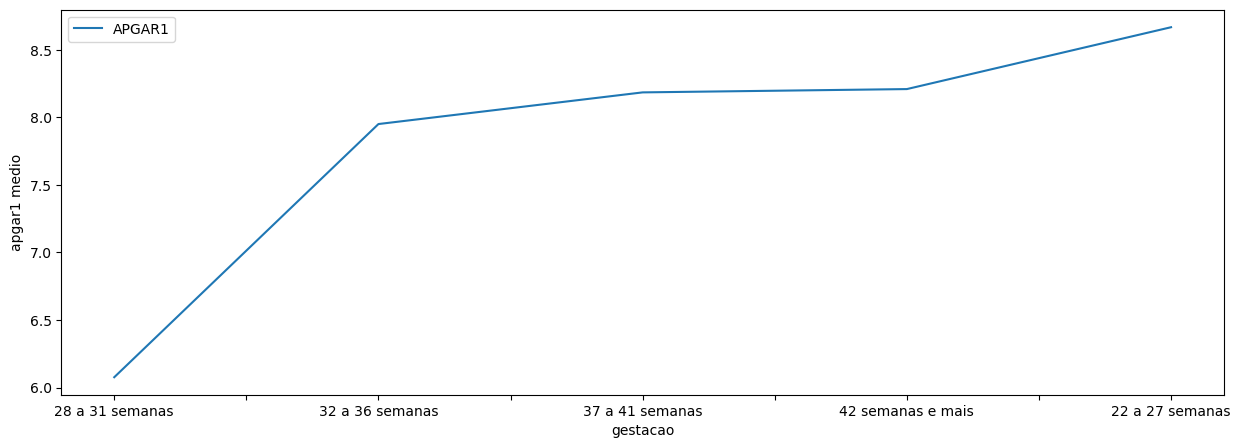

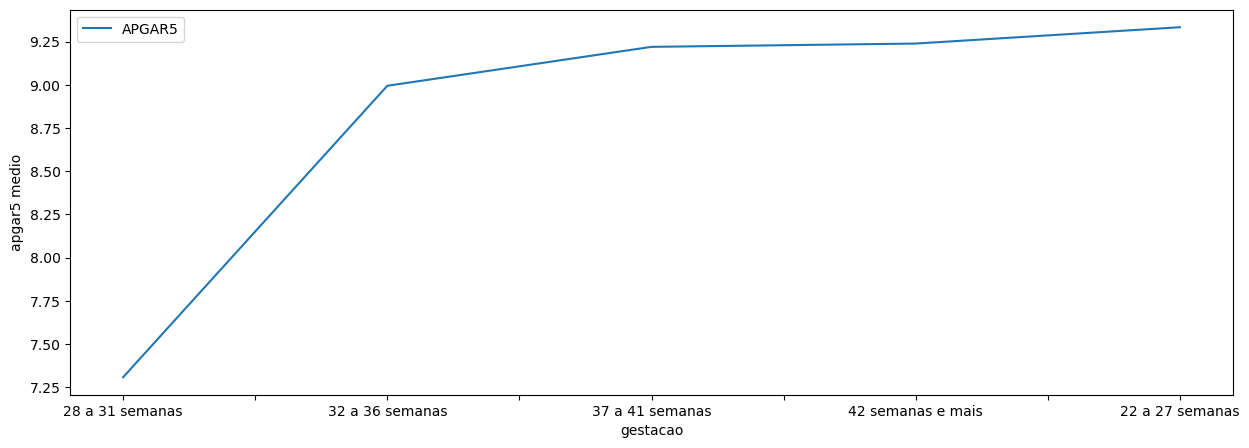

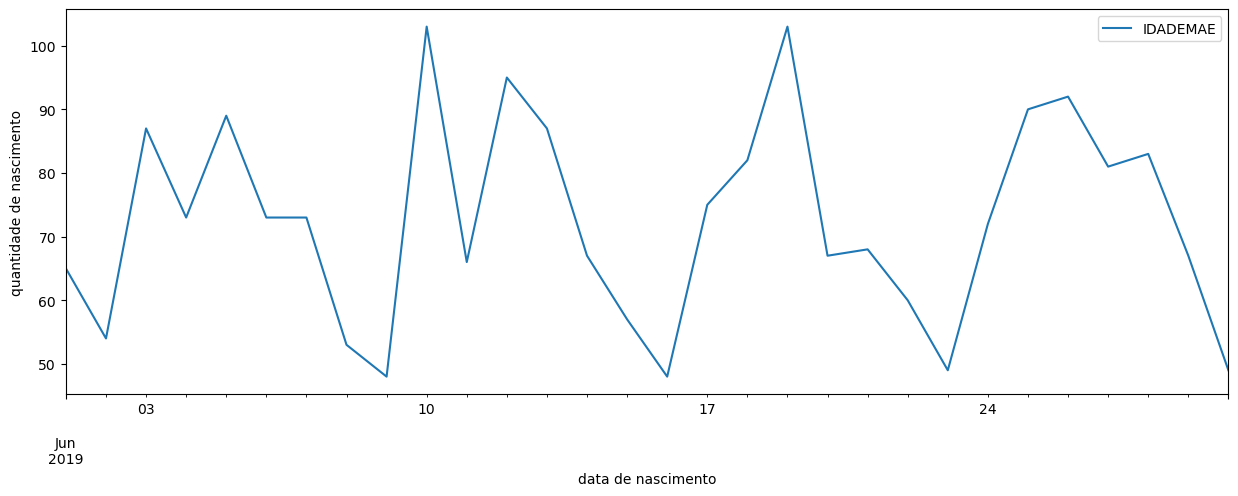

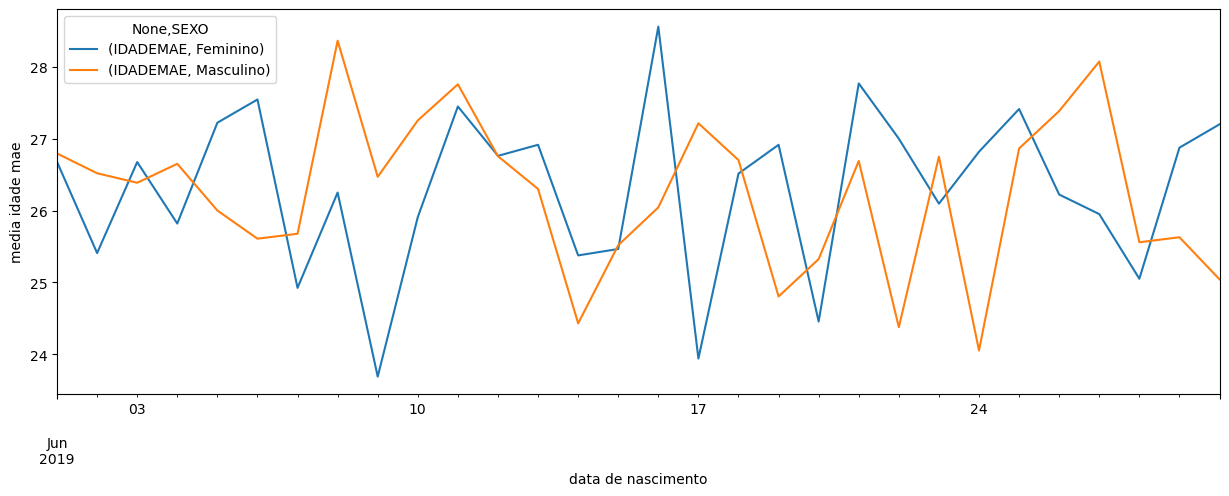

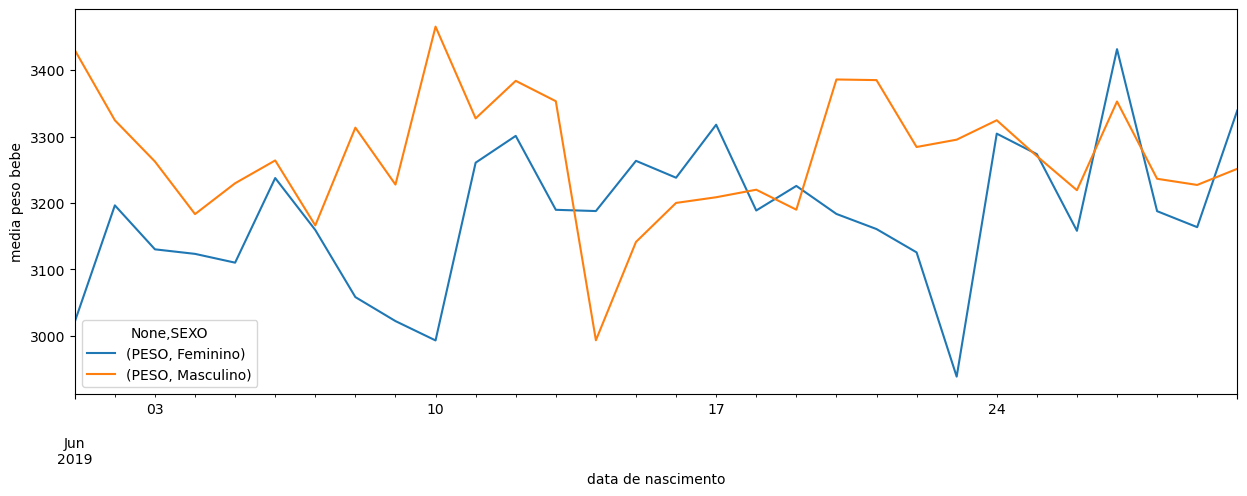

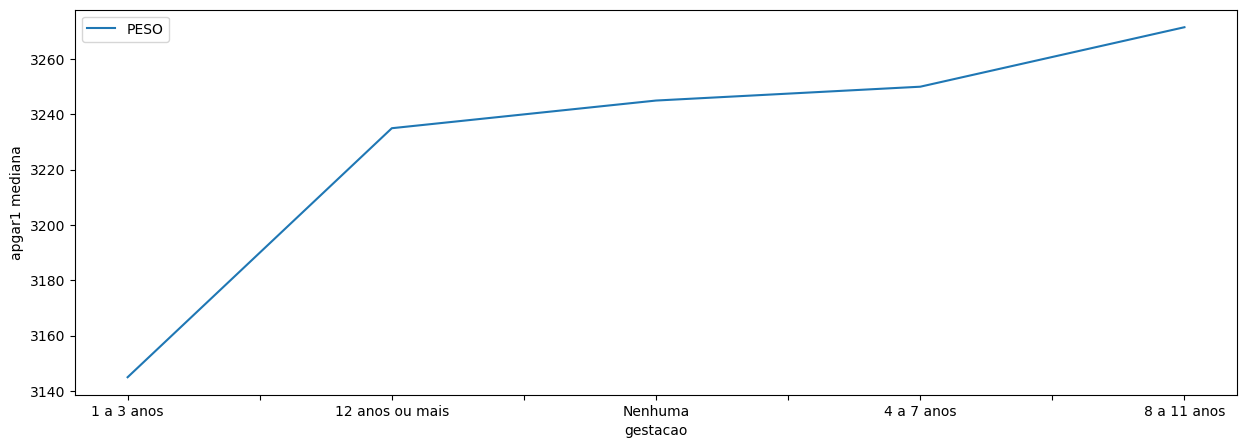

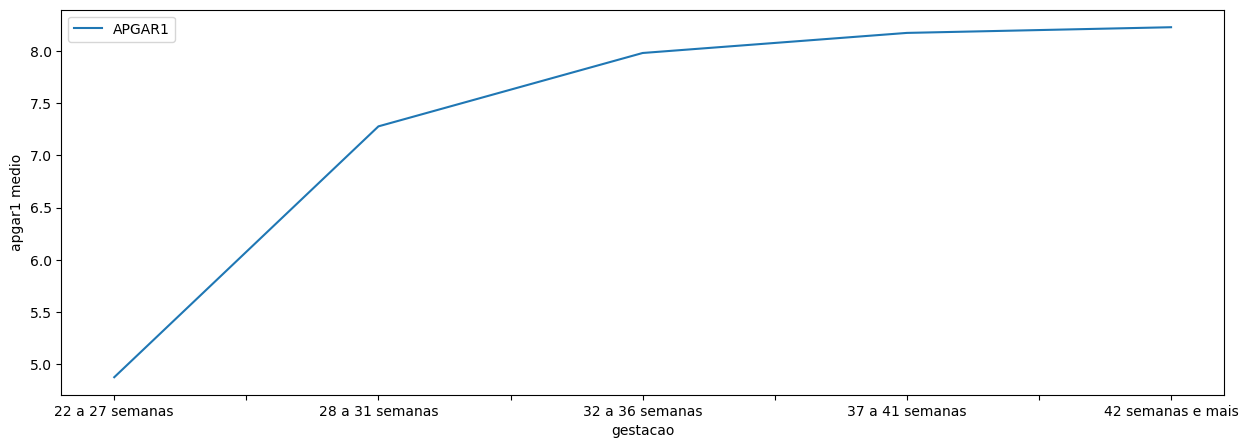

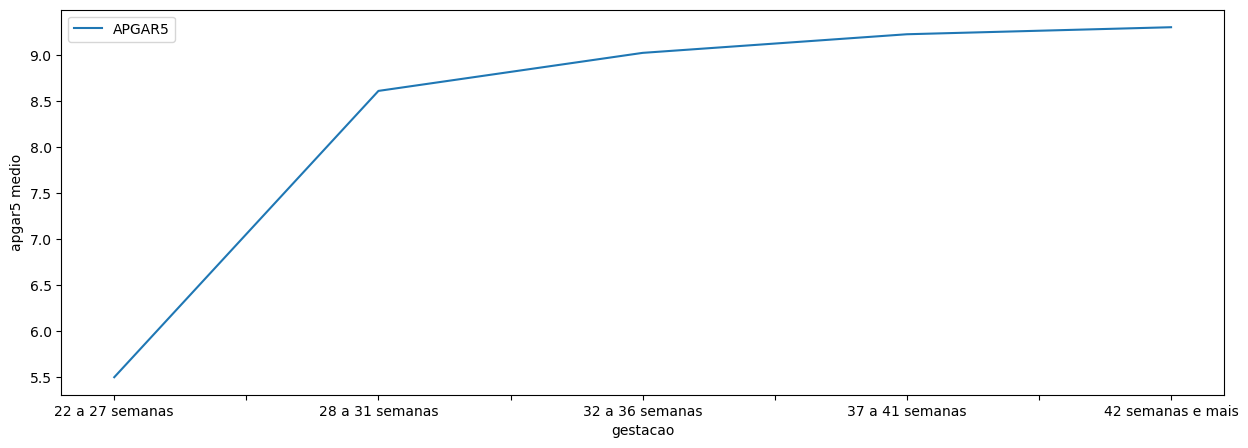

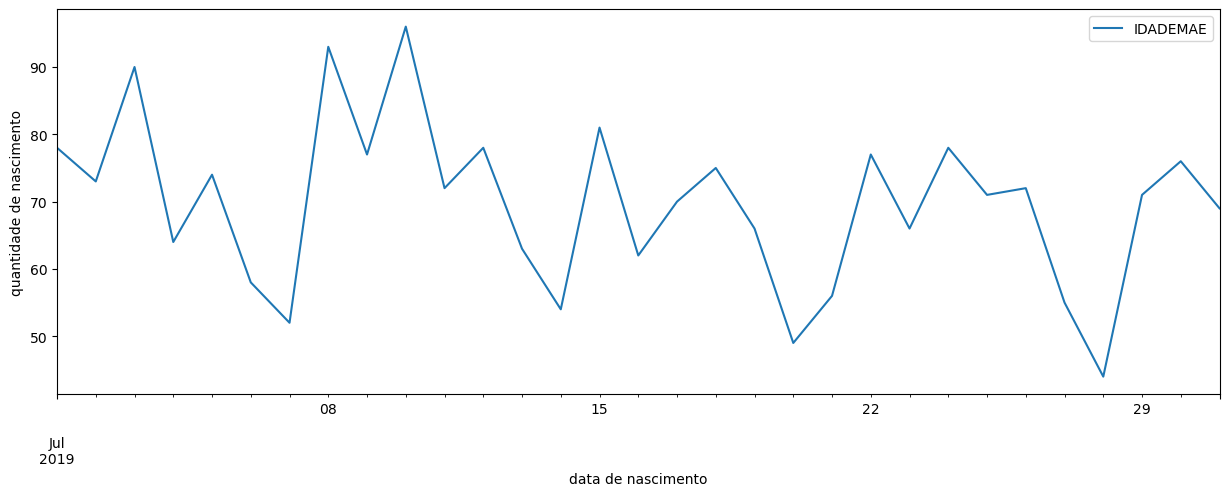

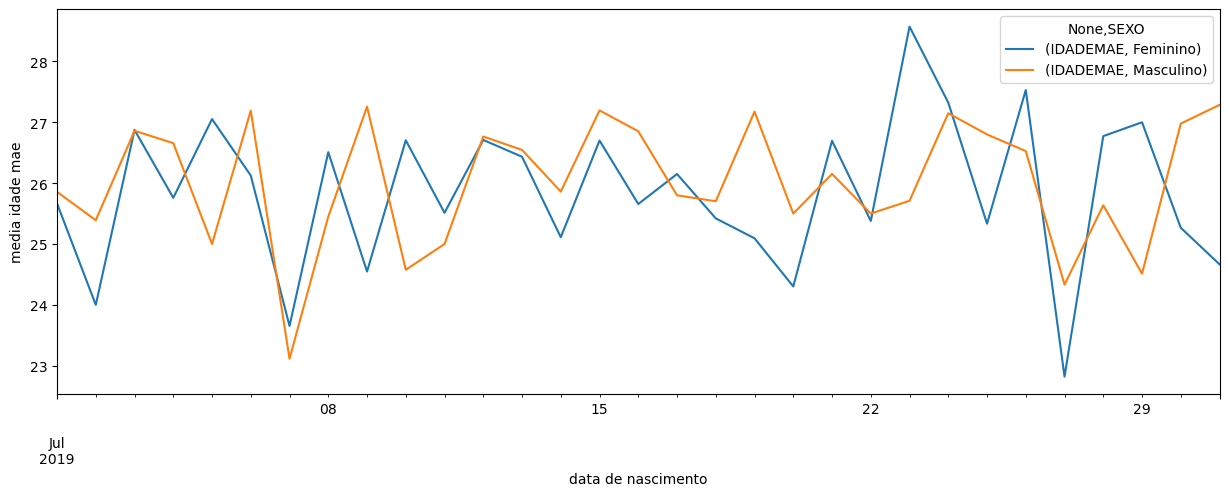

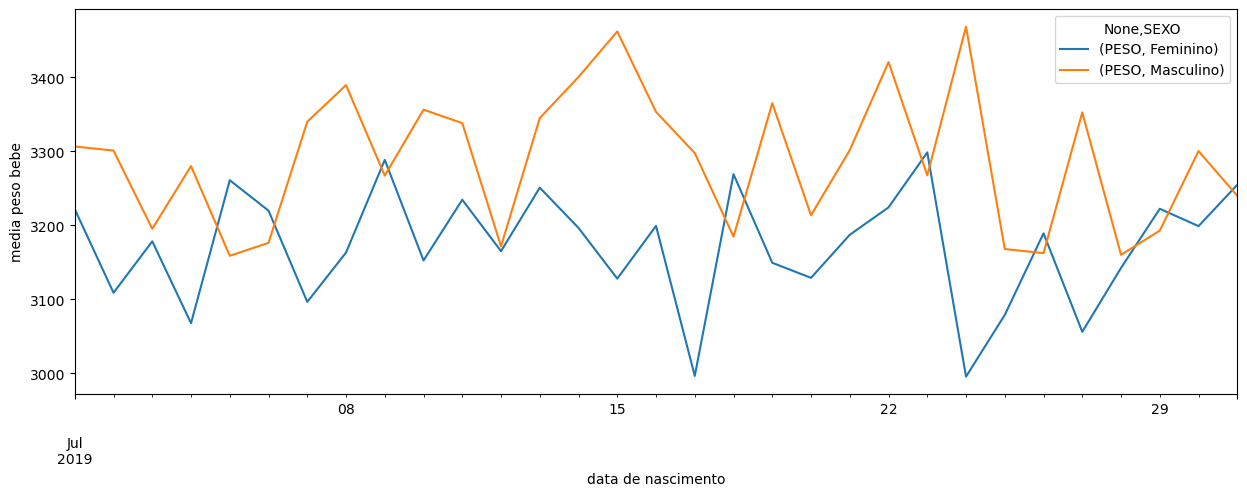

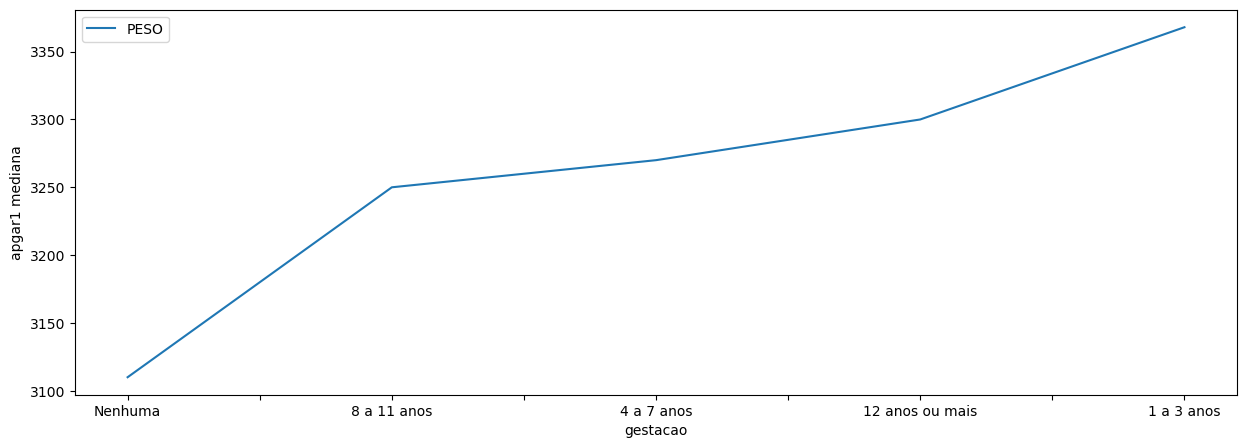

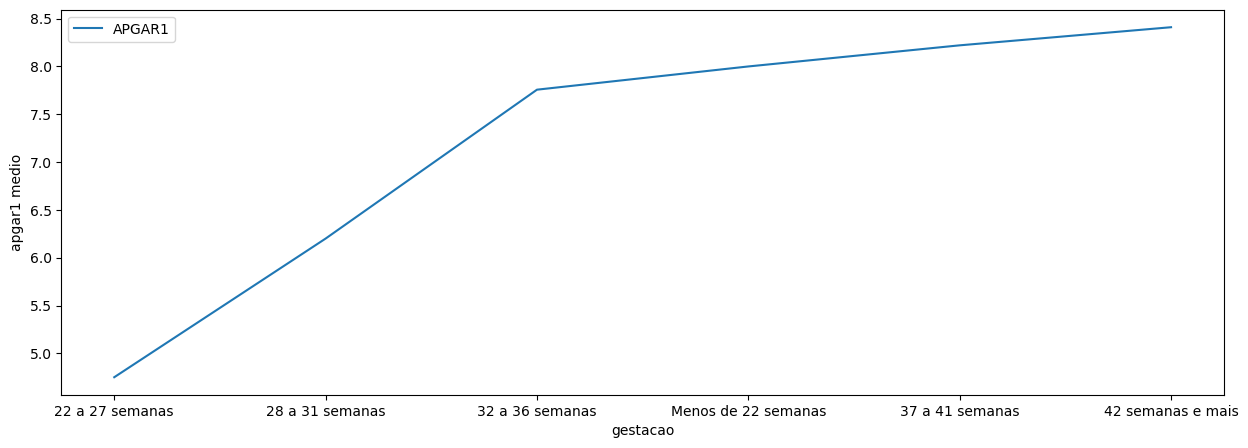

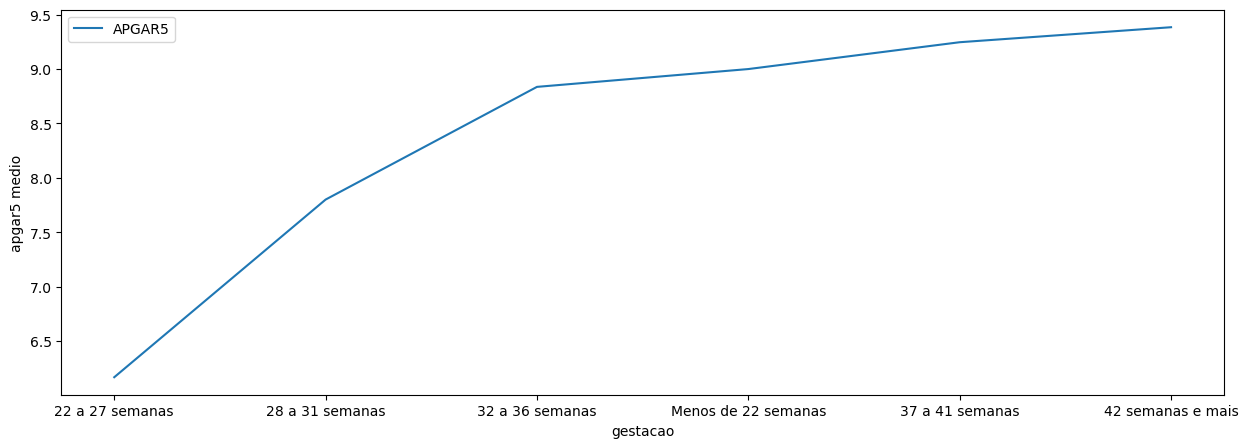

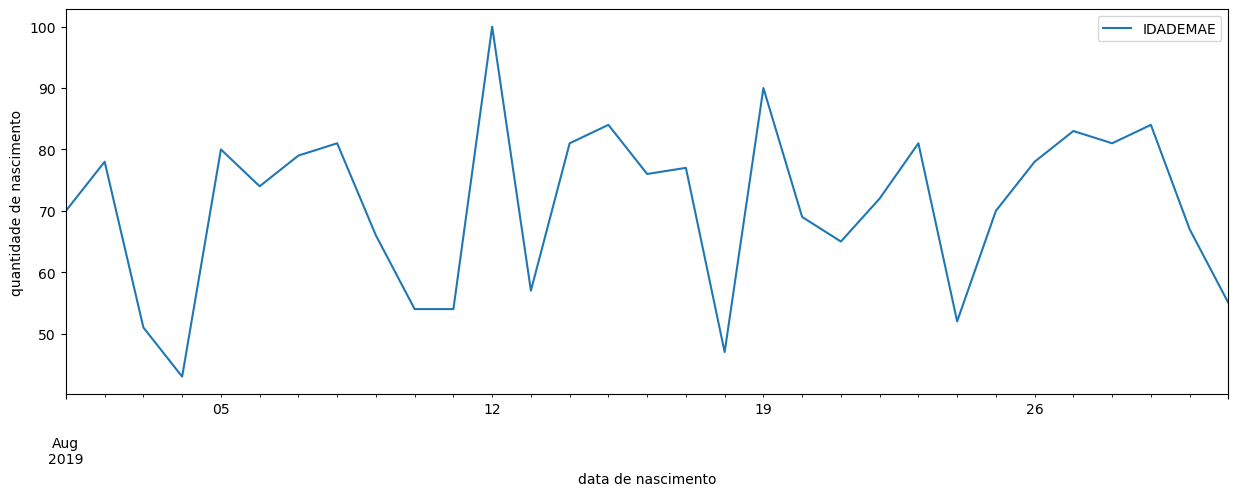

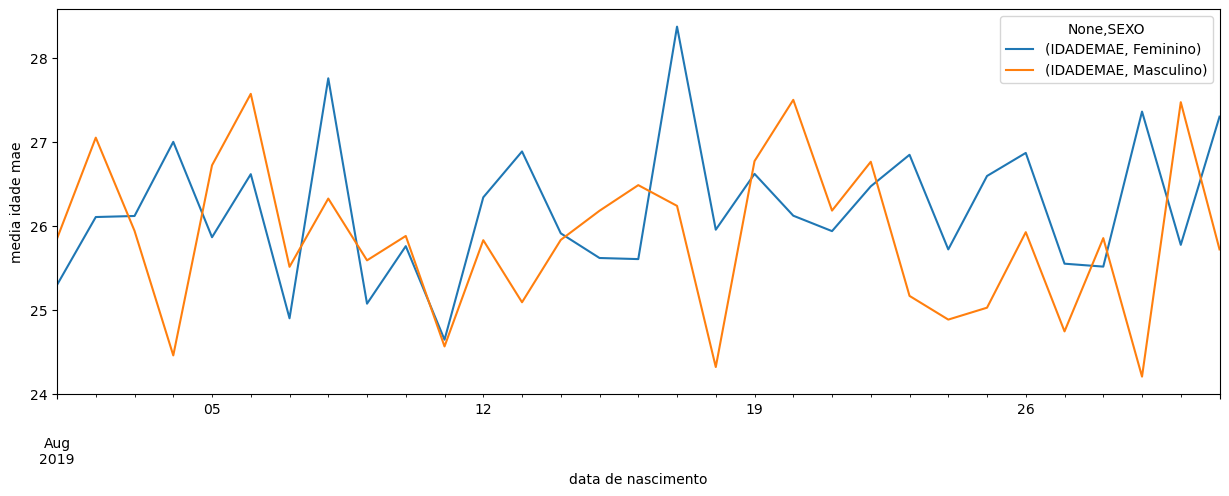

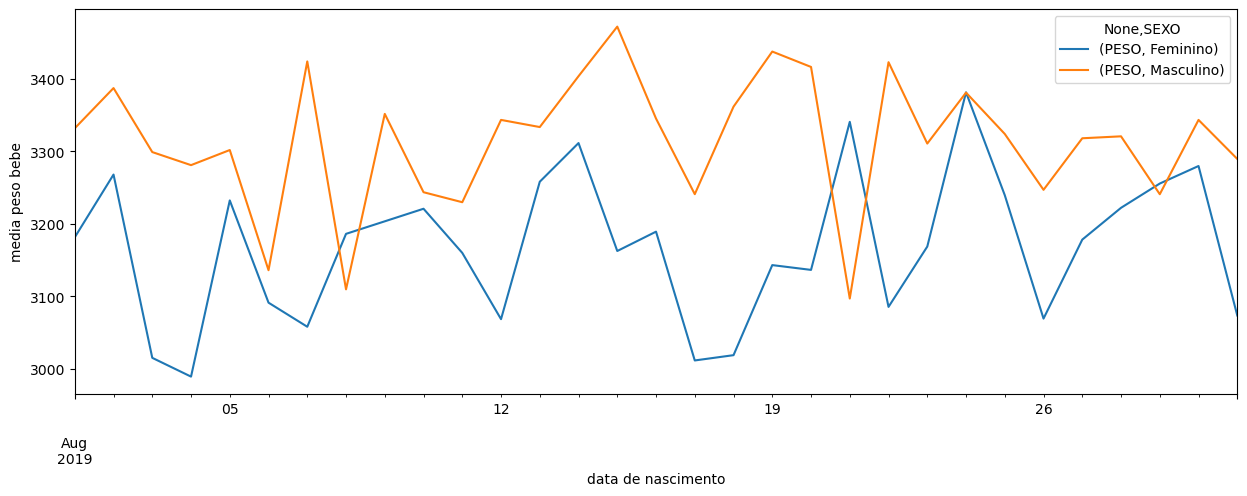

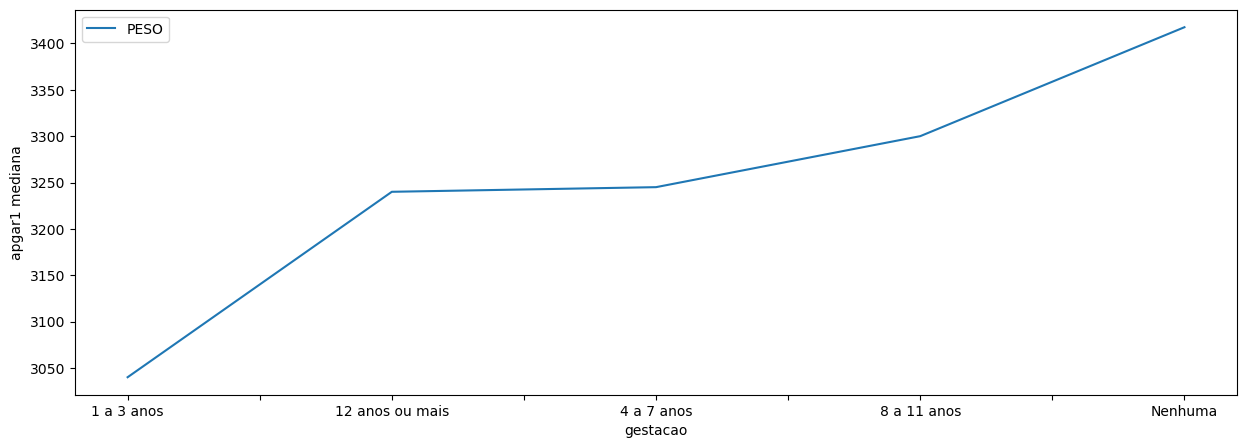

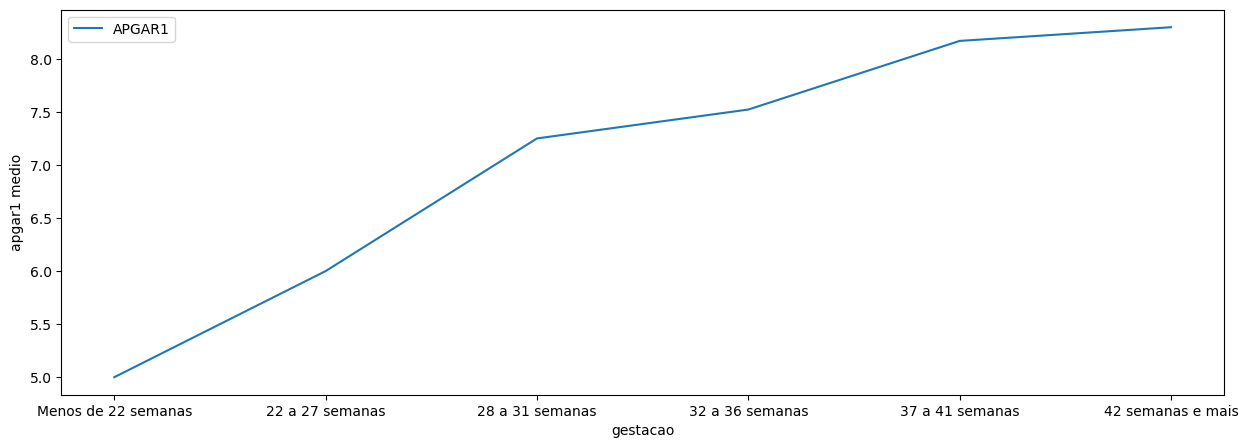

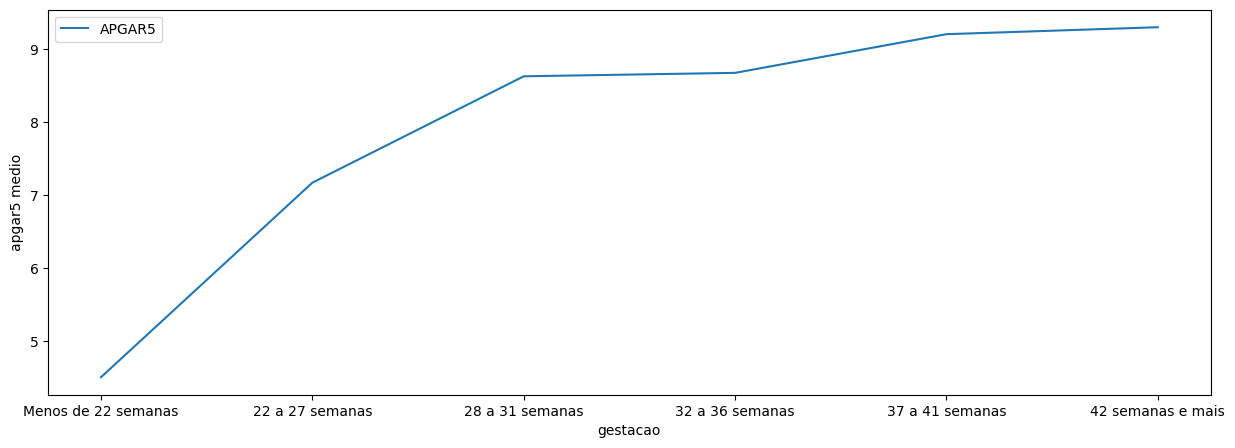

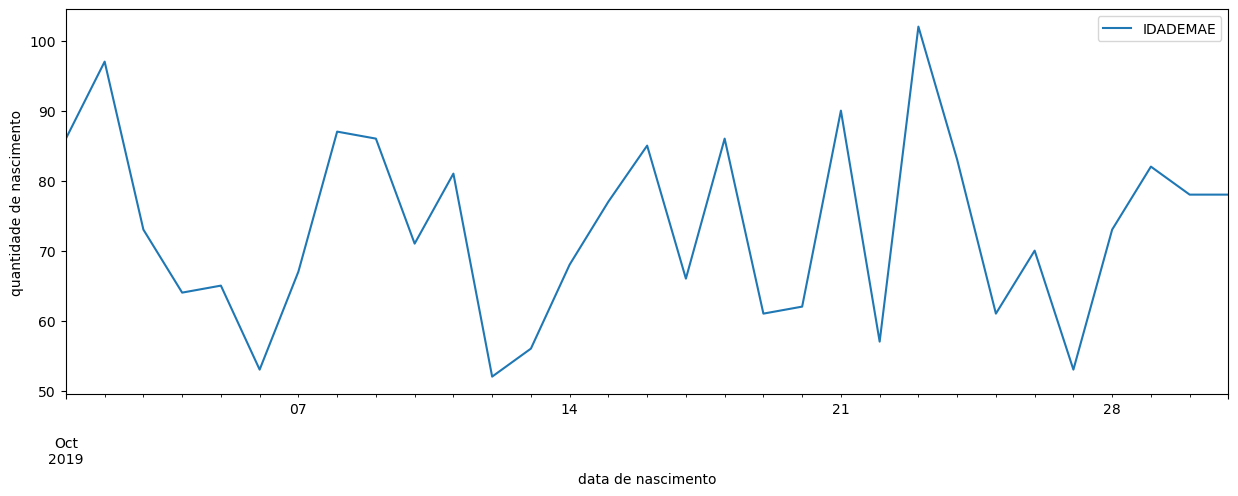

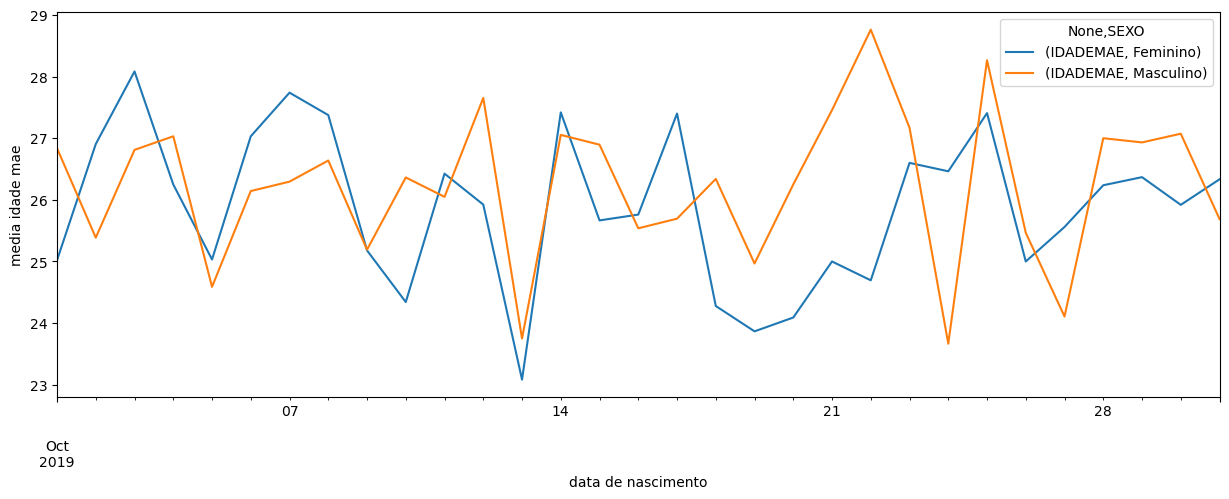

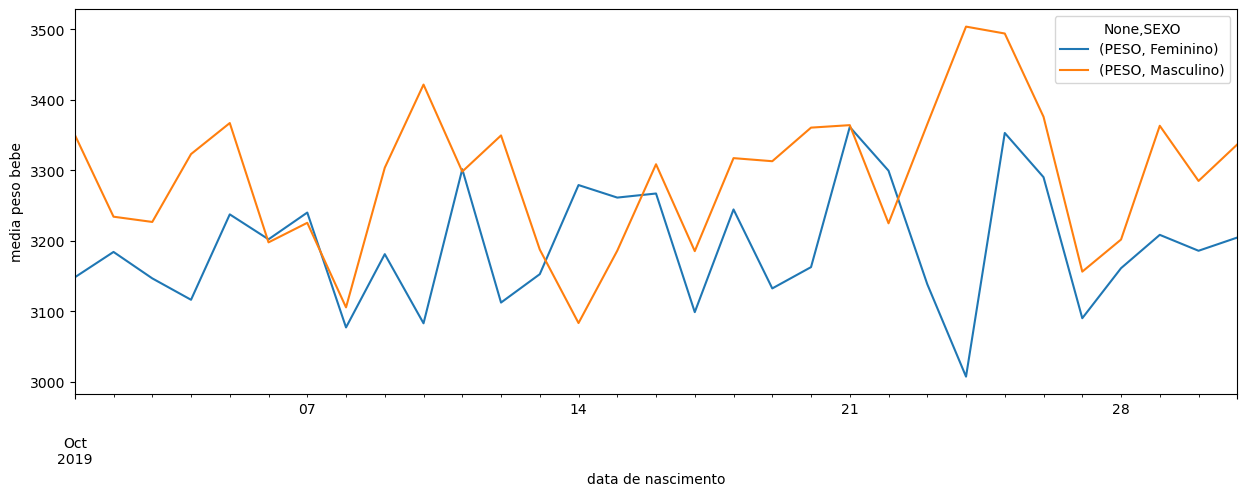

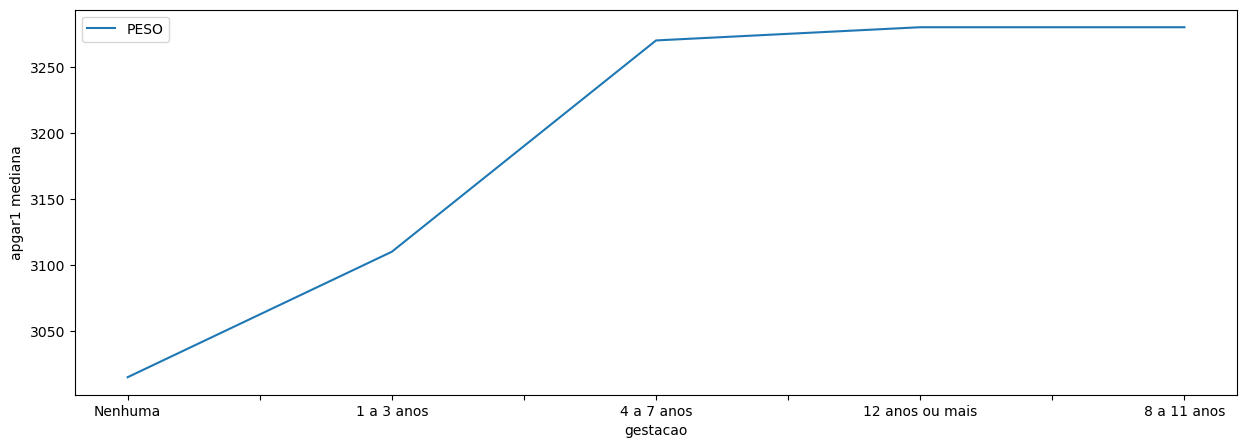

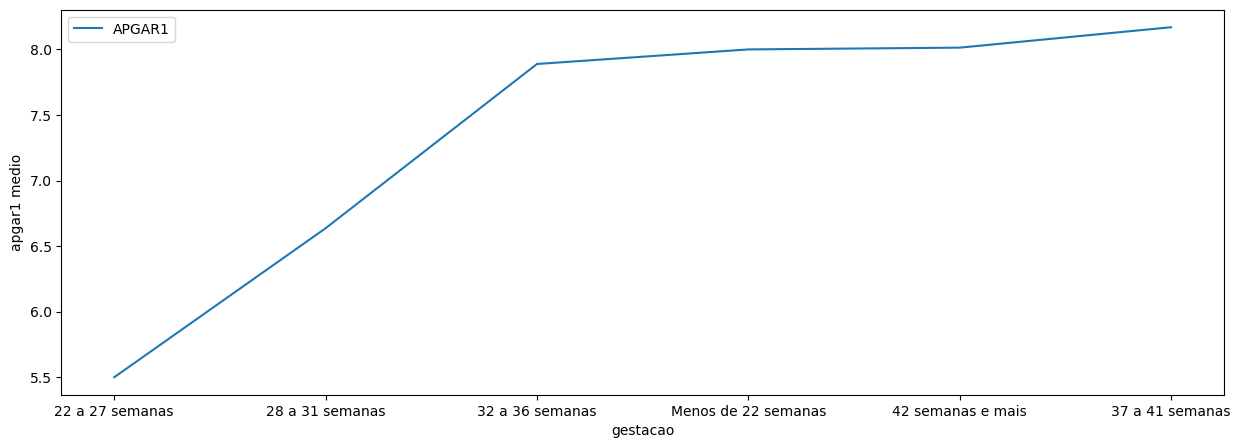

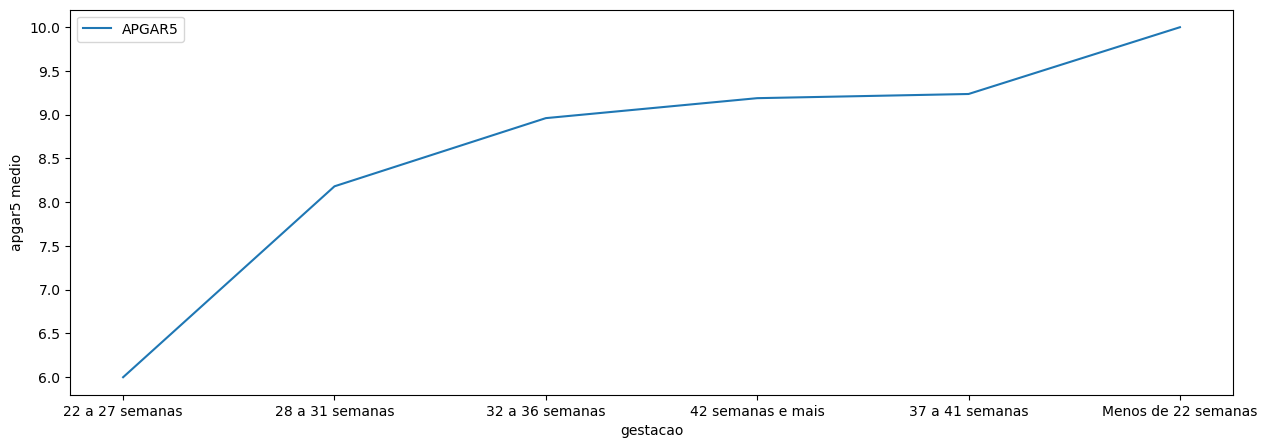

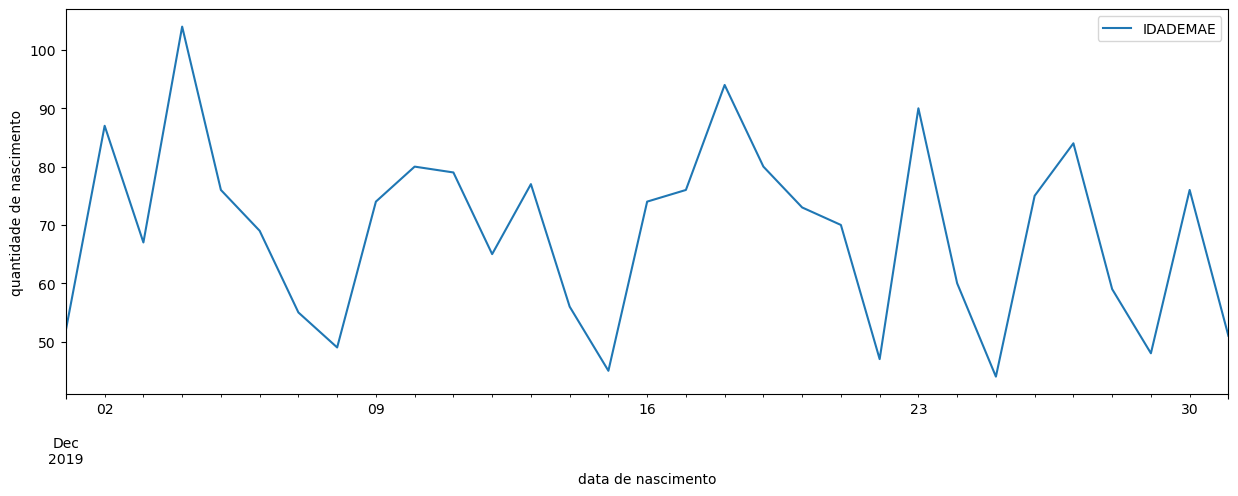

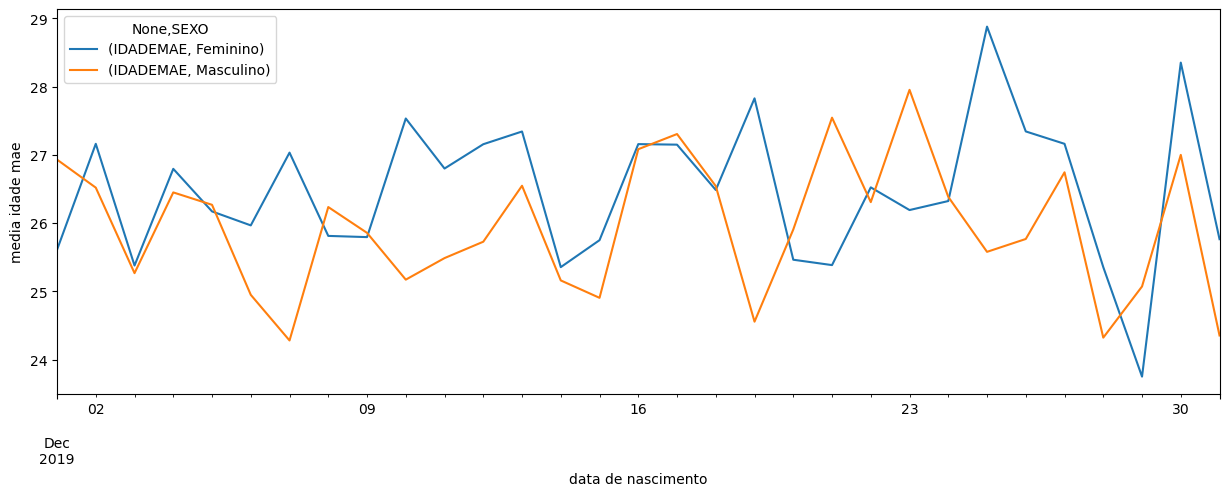

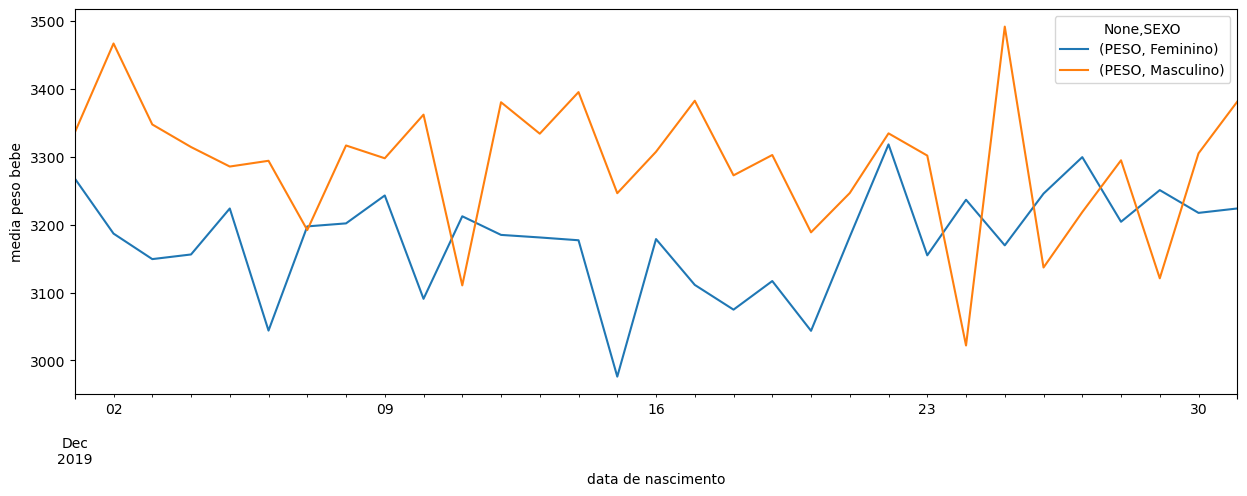

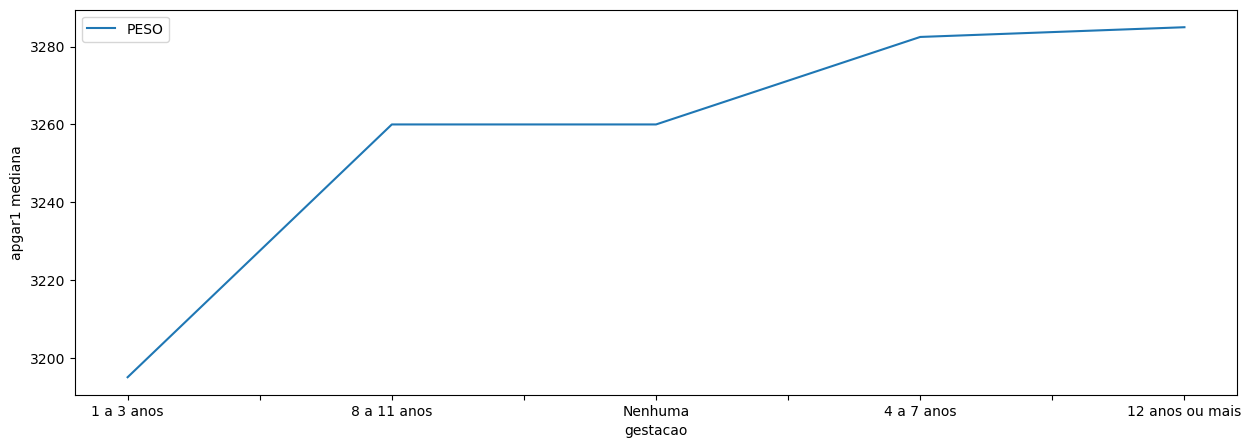

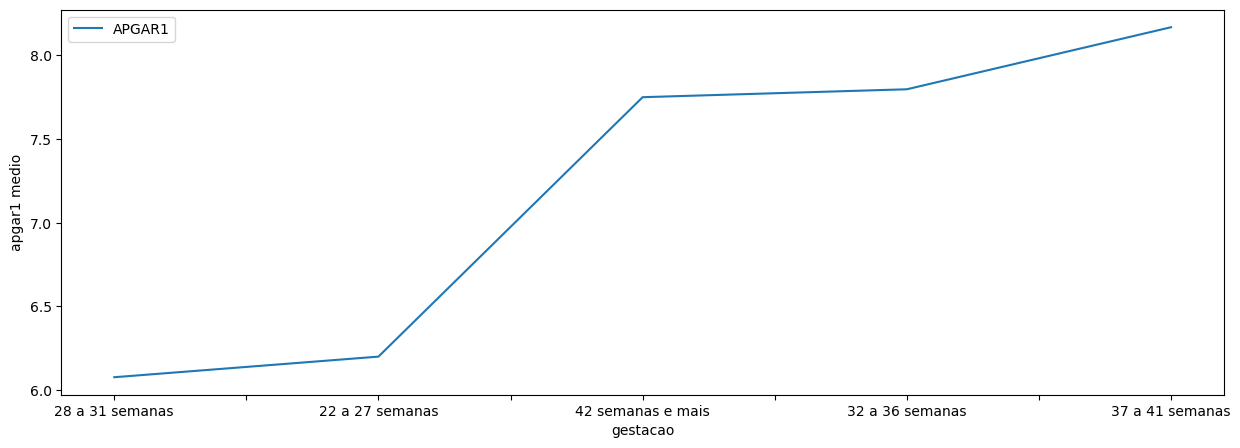

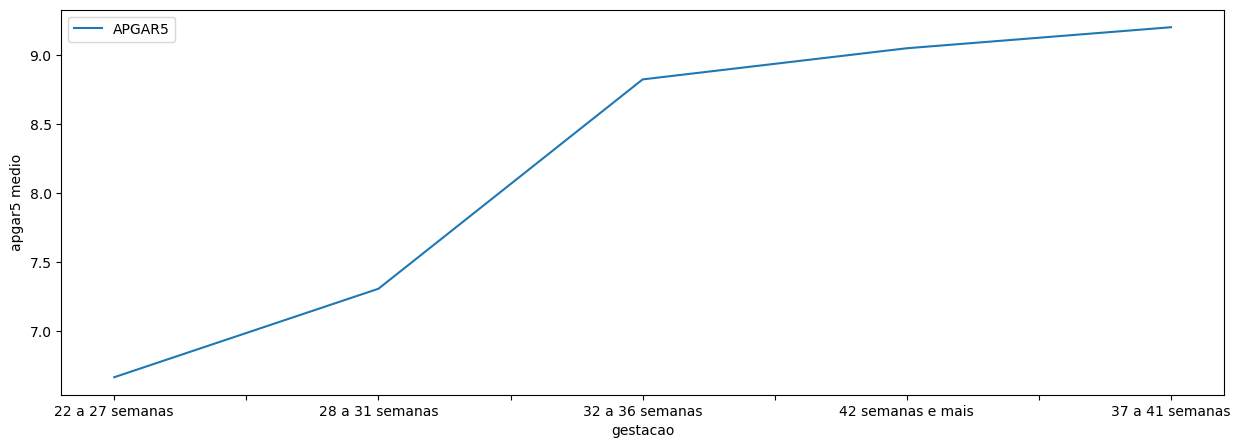

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def import_data_graph(nome_arq, slct_mes, slct_ano, value, index, func, ylabel, xlabel, opcao='std'):
    meses = {
        'Janeiro': 'Jan',
        'Fevereiro': 'Feb',
        'Março': 'Mar',
        'Abril': 'Apr',
        'Maio': 'May',
        'Junho': 'Jun',
        'Julho': 'Jul',
        'Agosto': 'Aug',
        'Setembro': 'Sep',
        'Outubro': 'Oct',
        'Novembro': 'Nov',
        'Dezembro': 'Dec'
    }

    # Importação dos dados
    df = pd.read_csv(nome_arq)
    
    # Seleção de data e ano
    df['DTNASC'] = pd.to_datetime(df['DTNASC'])
    selecao_data = df[(df['DTNASC'].dt.strftime('%b') == meses[slct_mes]) & (df['DTNASC'].dt.year == slct_ano)]
    # Definição de data
    max_date = selecao_data['DTNASC'].max().strftime('%Y-%m')
    os.makedirs('./import/figs/'+max_date, exist_ok=True)
    
    if opcao == 'std':
        pd.pivot_table(selecao_data, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
        plt.savefig(f'./import/figs/{max_date}/std {xlabel} por {ylabel}.png')
    elif opcao == 'sort':
        pd.pivot_table(selecao_data, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
        plt.savefig(f'./import/figs/{max_date}/sort {xlabel} por {ylabel}.png')
    elif opcao == 'unstack':
        pd.pivot_table(selecao_data, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
        plt.savefig(f'./import/figs/{max_date}/unstack {xlabel} por {ylabel}.png')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Loop para os meses definidos por sys.argv
if len(sys.argv) > 1:
    meses = sys.argv[1:] 

for mes in meses:

    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='IDADEMAE', index='DTNASC', func='count', 
                      ylabel='quantidade de nascimento', xlabel='data de nascimento')
    
    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='IDADEMAE', index=['DTNASC', 'SEXO'], func='mean', 
                      ylabel='media idade mae', xlabel='data de nascimento', opcao='unstack')
    
    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='PESO', index=['DTNASC', 'SEXO'], func='mean', 
                      ylabel='media peso bebe', xlabel='data de nascimento', opcao='unstack')

    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='PESO', index='ESCMAE', func='median', 
                      ylabel='apgar1 mediana', xlabel='gestacao', opcao='sort')

    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='APGAR1', index='GESTACAO', func='mean', 
                      ylabel='apgar1 medio', xlabel='gestacao', opcao='sort')

    import_data_graph(nome_arq='SINASC_RO_2019.csv', slct_mes=mes, slct_ano=2019,
                      value='APGAR5', index='GESTACAO', func='mean', 
                      ylabel='apgar5 medio', xlabel='gestacao', opcao='sort')
    